In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


In [ ]:
class MPNeuron:
    def __init__(self, threshold):
        self.threshold = threshold

    def activate(self, inputs, weights):
        weighted_sum = np.dot(inputs, weights)
        return 1 if weighted_sum >= self.threshold else 0


def test_mp_neuron():
    neuron = MPNeuron(threshold=2)
    weights = [1, 1]
    print("AND Gate")
    for x in [(0,0),(0,1),(1,0),(1,1)]:
        print(x, neuron.activate(x, weights))

    neuron.threshold = 1
    print("\nOR Gate")
    for x in [(0,0),(0,1),(1,0),(1,1)]:
        print(x, neuron.activate(x, weights))

test_mp_neuron()


AND Gate
(0, 0) 0
(0, 1) 0
(1, 0) 0
(1, 1) 1

OR Gate
(0, 0) 0
(0, 1) 1
(1, 0) 1
(1, 1) 1


In [ ]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=100):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.errors = []

    def activation(self, x):
        return np.where(x >= 0, 1, 0)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        self.errors = []

        for _ in range(self.n_iters):
            errors_epoch = 0
            for idx in range(n_samples):
                linear_output = np.dot(X[idx], self.weights) + self.bias
                y_pred = self.activation(linear_output)
                error = y[idx] - y_pred

                if error != 0:
                    self.weights += self.lr * error * X[idx]
                    self.bias += self.lr * error
                    errors_epoch += 1

            self.errors.append(errors_epoch)
            if errors_epoch == 0:
                break

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation(linear_output)


In [ ]:
X, y = make_blobs(n_samples=200,
                  centers=2,
                  n_features=2,
                  cluster_std=1.5,
                  random_state=42)

y = np.where(y == 0, 0, 1)


In [ ]:
perceptron = Perceptron(learning_rate=0.1, n_iters=50)
perceptron.fit(X, y)


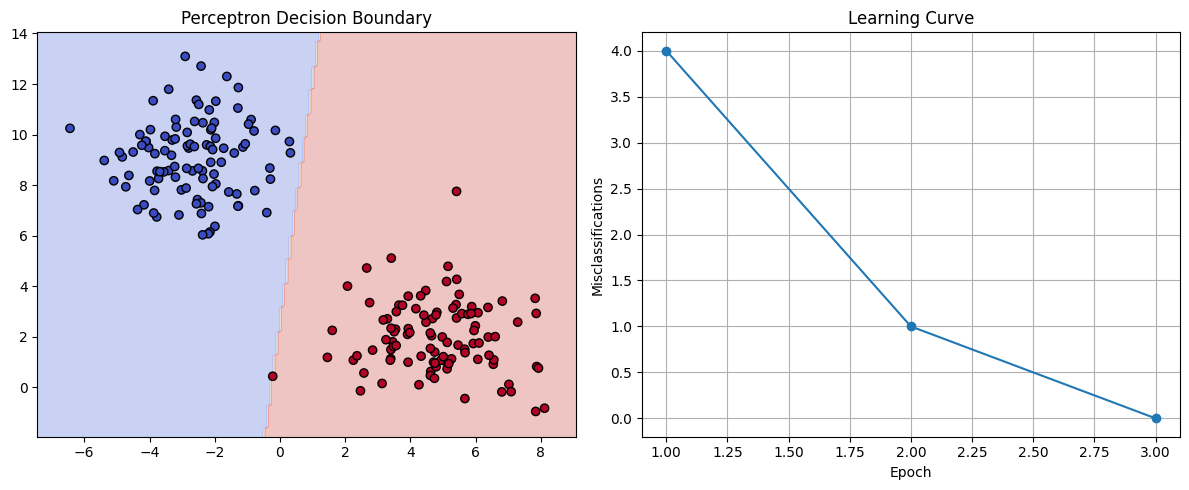

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

# the dicision boundary
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax1.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
ax1.scatter(X[:,0], X[:,1], c=y, cmap="coolwarm", edgecolors='k')
ax1.set_title("Perceptron Decision Boundary")

# learning curve
ax2.plot(range(1, len(perceptron.errors)+1),
         perceptron.errors, marker='o')
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Misclassifications")
ax2.set_title("Learning Curve")
ax2.grid()

plt.tight_layout()
plt.show()


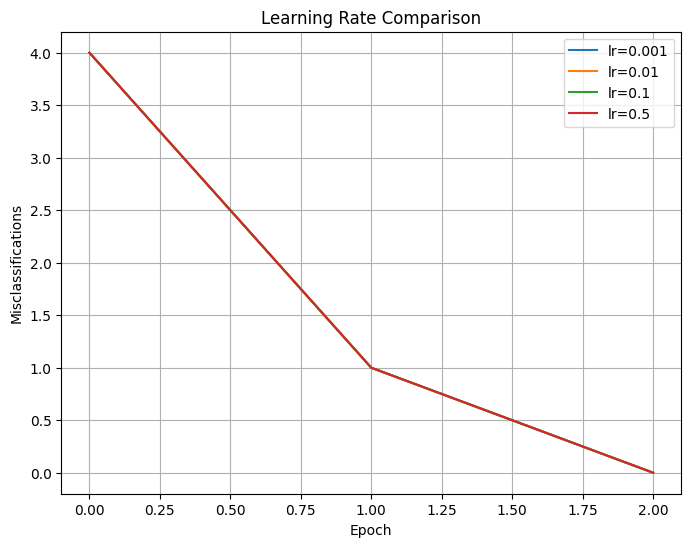

In [ ]:
learning_rates = [0.001, 0.01, 0.1, 0.5]

plt.figure(figsize=(8,6))

for lr in learning_rates:
    p = Perceptron(learning_rate=lr, n_iters=50)
    p.fit(X, y)
    plt.plot(p.errors, label=f"lr={lr}")

plt.xlabel("Epoch")
plt.ylabel("Misclassifications")
plt.title("Learning Rate Comparison")
plt.legend()
plt.grid()
plt.show()


In [ ]:
X_xor = np.array([[0,0],[0,1],[1,0],[1,1]])
y_xor = np.array([0,1,1,0])

xor_model = Perceptron(learning_rate=0.1, n_iters=50)
xor_model.fit(X_xor, y_xor)

print("XOR Predictions:")
for x, y_true in zip(X_xor, y_xor):
    print(x, "->", xor_model.predict(x.reshape(1,-1))[0])


XOR Predictions:
[0 0] -> 1
[0 1] -> 1
[1 0] -> 0
[1 1] -> 0


In [ ]:
X_xor = np.array([[0,0],[0,1],[1,0],[1,1]])
y_xor = np.array([0,1,1,0])

xor_model = Perceptron(learning_rate=0.1, n_iters=50)
xor_model.fit(X_xor, y_xor)

print("XOR Predictions:")
for x, y_true in zip(X_xor, y_xor):
    print(x, "->", xor_model.predict(x.reshape(1,-1))[0])


XOR Predictions:
[0 0] -> 1
[0 1] -> 1
[1 0] -> 0
[1 1] -> 0


In [ ]:
class PocketPerceptron(Perceptron):
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        best_weights = self.weights.copy()
        best_bias = self.bias
        best_score = 0

        for _ in range(self.n_iters):
            errors_epoch = 0

            for idx in range(n_samples):
                linear_output = np.dot(X[idx], self.weights) + self.bias
                y_pred = self.activation(linear_output)
                error = y[idx] - y_pred

                if error != 0:
                    self.weights += self.lr * error * X[idx]
                    self.bias += self.lr * error
                    errors_epoch += 1

            predictions = self.predict(X)
            score = np.mean(predictions == y)

            if score > best_score:
                best_score = score
                best_weights = self.weights.copy()
                best_bias = self.bias

        self.weights = best_weights
        self.bias = best_bias
